In [21]:
# 0. Import

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [22]:
import celloracle as co
co.__version__

'0.18.0'

In [23]:
# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [17]:
adata_big = sc.read("../../h5ad/v3_allGenes_myeloid_unintegrated_annotated.h5ad")
adata_big

AnnData object with n_obs × n_vars = 382320 × 32914
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'unintegrated_clusters', 'seurat_clusters', 'disease.patient', 'celltypes', 'celltypes.disease', 'celltypes.disease.state'
    var: 'vf_vst_counts.1_mean', 'vf_vst_counts.1_variance', 'vf_vst_counts.1_variance.expected', 'vf_vst_counts.1_variance.standardized', 'vf_vst_counts.1_variable', 'vf_vst_counts.1_rank', 'vf_vst_counts.2_mean', 'vf_vst_counts.2_variance', 'vf_vst_counts.2_variance.expected', 'vf_vst_counts.2_variance.standardized', 'vf_vst_counts.2_variable', 'vf_vst_counts.2_rank', 'vf_vst_counts.3_mean', 'vf_vst_counts.3_variance', 'vf_vst_counts.3_variance.expected', 'vf_vst_counts.3_variance.standardized', 'vf_vst_counts.3_variable', 'vf_vst_counts.3_rank', 'vf_vst_counts.4_mean', 'vf_vst_counts.4_variance', 'vf_vst_counts.4_variance.expected', 'vf_vst

In [24]:
adata_big.obs['celltypes']

GEM1_AAACCCAAGACCGCCT-1        Classical
GEM1_AAACCCAAGAGTGGCT-1        Classical
GEM1_AAACCCAAGTATCCTG-1        Classical
GEM1_AAACCCAAGTGAGGTC-1     Nonclassical
GEM1_AAACCCACAACGCATT-1        Classical
                                ...     
GEM30_TTTGGTTTCACCCTTG-1    Nonclassical
GEM30_TTTGGTTTCCGATTAG-1       Classical
GEM30_TTTGGTTTCGTTCAGA-1       Classical
GEM30_TTTGTTGAGCTCTTCC-1       Classical
GEM30_TTTGTTGTCCGGTAGC-1       Classical
Name: celltypes, Length: 382320, dtype: category
Categories (4, object): ['Classical', 'Nonclassical', 'Intermediate', 'mo-DC']

In [26]:
adata = adata_big[adata_big.obs['celltypes'].isin(['Classical'])]

In [18]:
del adata_big

In [27]:
adata = adata[adata.obs['prog'].isin(['progressor', 'RR'])]

In [10]:
adata_big.obs.head()

NameError: name 'adata_big' is not defined

In [28]:
# Random downsampling into 30K cells if the anndata object include more than 30 K cells.
n_cells_downsample = 30000
if adata.shape[0] > n_cells_downsample:
    # Let's dowmsample into 30K cells
    sc.pp.subsample(adata, n_obs=n_cells_downsample, random_state=123)

In [29]:
adata

AnnData object with n_obs × n_vars = 30000 × 32914
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'unintegrated_clusters', 'seurat_clusters', 'disease.patient', 'celltypes', 'celltypes.disease', 'celltypes.disease.state'
    var: 'vf_vst_counts.1_mean', 'vf_vst_counts.1_variance', 'vf_vst_counts.1_variance.expected', 'vf_vst_counts.1_variance.standardized', 'vf_vst_counts.1_variable', 'vf_vst_counts.1_rank', 'vf_vst_counts.2_mean', 'vf_vst_counts.2_variance', 'vf_vst_counts.2_variance.expected', 'vf_vst_counts.2_variance.standardized', 'vf_vst_counts.2_variable', 'vf_vst_counts.2_rank', 'vf_vst_counts.3_mean', 'vf_vst_counts.3_variance', 'vf_vst_counts.3_variance.expected', 'vf_vst_counts.3_variance.standardized', 'vf_vst_counts.3_variable', 'vf_vst_counts.3_rank', 'vf_vst_counts.4_mean', 'vf_vst_counts.4_variance', 'vf_vst_counts.4_variance.expected', 'vf_vst_

In [31]:
adata.obs['prog'] = adata.obs['prog'].astype('category')

In [15]:
adata

AnnData object with n_obs × n_vars = 30000 × 32914
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'unintegrated_clusters', 'seurat_clusters', 'disease.patient', 'celltypes', 'celltypes.disease', 'celltypes.disease.state'
    var: 'vf_vst_counts.1_mean', 'vf_vst_counts.1_variance', 'vf_vst_counts.1_variance.expected', 'vf_vst_counts.1_variance.standardized', 'vf_vst_counts.1_variable', 'vf_vst_counts.1_rank', 'vf_vst_counts.2_mean', 'vf_vst_counts.2_variance', 'vf_vst_counts.2_variance.expected', 'vf_vst_counts.2_variance.standardized', 'vf_vst_counts.2_variable', 'vf_vst_counts.2_rank', 'vf_vst_counts.3_mean', 'vf_vst_counts.3_variance', 'vf_vst_counts.3_variance.expected', 'vf_vst_counts.3_variance.standardized', 'vf_vst_counts.3_variable', 'vf_vst_counts.3_rank', 'vf_vst_counts.4_mean', 'vf_vst_counts.4_variance', 'vf_vst_counts.4_variance.expected', 'vf_vst_

In [32]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="prog", subset=True)

In [17]:
adata

AnnData object with n_obs × n_vars = 30000 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'unintegrated_clusters', 'seurat_clusters', 'disease.patient', 'celltypes', 'celltypes.disease', 'celltypes.disease.state'
    var: 'vf_vst_counts.1_mean', 'vf_vst_counts.1_variance', 'vf_vst_counts.1_variance.expected', 'vf_vst_counts.1_variance.standardized', 'vf_vst_counts.1_variable', 'vf_vst_counts.1_rank', 'vf_vst_counts.2_mean', 'vf_vst_counts.2_variance', 'vf_vst_counts.2_variance.expected', 'vf_vst_counts.2_variance.standardized', 'vf_vst_counts.2_variable', 'vf_vst_counts.2_rank', 'vf_vst_counts.3_mean', 'vf_vst_counts.3_variance', 'vf_vst_counts.3_variance.expected', 'vf_vst_counts.3_variance.standardized', 'vf_vst_counts.3_variable', 'vf_vst_counts.3_rank', 'vf_vst_counts.4_mean', 'vf_vst_counts.4_variance', 'vf_vst_counts.4_variance.expected', 'vf_vst_c

In [11]:
base_GRN = co.data.load_human_promoter_base_GRN()

Loading prebuilt promoter base-GRN. Version: hg19_gimmemotifsv5_fpr2


In [12]:
# Instantiate Oracle object
oracle = co.Oracle()

In [13]:
# Check data in anndata
print("Metadata columns :", list(adata.obs.columns))
print("Dimensional reduction: ", list(adata.obsm.keys()))

Metadata columns : ['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'unintegrated_clusters', 'seurat_clusters', 'disease.patient', 'celltypes', 'celltypes.disease', 'celltypes.disease.state']
Dimensional reduction:  ['X_pca', 'X_umap.unintegrated']


In [14]:
adata.obsm["X_umap.unintegrated"]

array([[-6.41481394,  0.42471062],
       [-2.65904039, -0.68098161],
       [-0.10506971, -1.05866505],
       ...,
       [-5.72307295,  2.39560269],
       [-3.56958741, -0.80806418],
       [-4.71151966,  0.7659031 ]])

In [33]:
# subset = adata[:, adata.var["highly_variable"]]

In [40]:
# subset.obsm["X_umap.unintegrated"]

ArrayView([[-6.41481394,  0.42471062],
           [-2.65904039, -0.68098161],
           [-0.10506971, -1.05866505],
           ...,
           [-5.72307295,  2.39560269],
           [-3.56958741, -0.80806418],
           [-4.71151966,  0.7659031 ]])

In [15]:
adata.layers["counts"]

<30000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 8768980 stored elements in Compressed Sparse Column format>

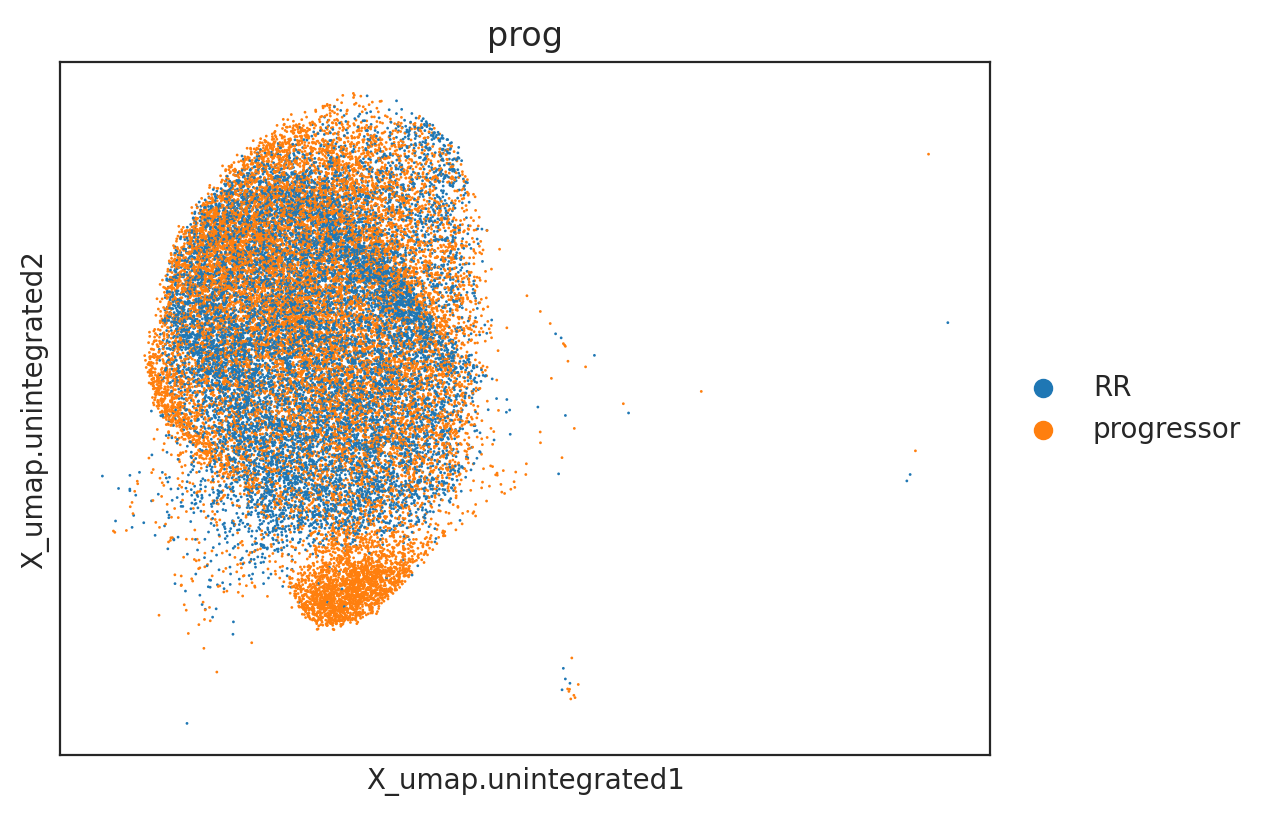

In [16]:
# In this notebook, we use the unscaled mRNA count for the nput of Oracle object.
# adata.X = adata.layers["counts"].copy()

# Instantiate Oracle object.
oracle.import_anndata_as_raw_count(adata=adata,
                                   cluster_column_name="prog",
                                   embedding_name="X_umap.unintegrated")



In [19]:
# You can load TF info dataframe with the following code.
oracle.import_TF_data(TF_info_matrix=base_GRN)

# Alternatively, if you saved the informmation as a dictionary, you can use the code below.
# oracle.import_TF_data(TFdict=TFinfo_dictionary)

TF dict already exists. The old TF dict data was deleted. 



In [20]:
# Perform PCA
oracle.perform_PCA()

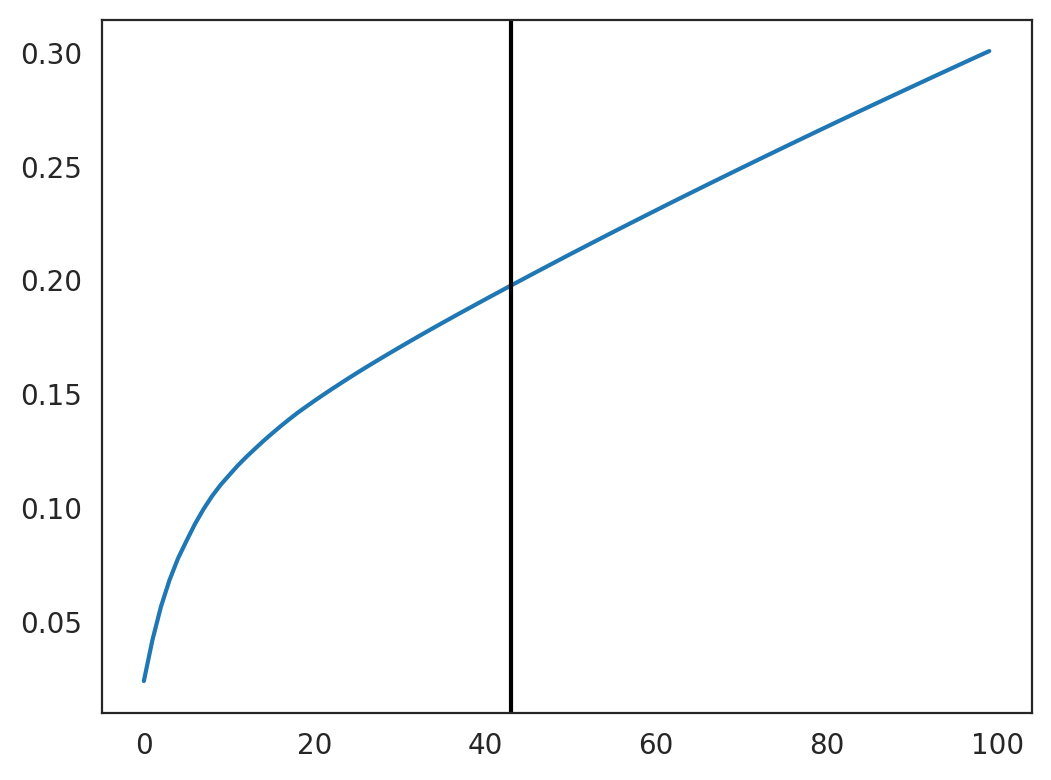

43


In [21]:
# Select important PCs
plt.plot(np.cumsum(oracle.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
plt.show()
print(n_comps)
n_comps = min(n_comps, 50)

In [22]:
n_cell = oracle.adata.shape[0]
print(f"cell number is :{n_cell}")

cell number is :30000


In [23]:

k = int(0.025*n_cell)
print(f"Auto-selected k is :{k}")

Auto-selected k is :750


In [24]:
oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8,
                      b_maxl=k*4, n_jobs=28)



In [26]:
# Save oracle object.
oracle.to_hdf5("../../h5ad/myeloid_BP2_unintegrated_annotated2.celloracle.oracle")

In [4]:
oracle = co.load_hdf5("../../h5ad/Classical_prog_RR.celloracle.oracle")

In [5]:
%%time
# Calculate GRN for each population in "louvain_annot" clustering unit.
# This step may take some time.(~30 minutes)
links = oracle.get_links(cluster_name_for_GRN_unit="prog", alpha=10,
                         verbose_level=10)

  0%|          | 0/2 [00:00<?, ?it/s]

Inferring GRN for RR...


  0%|          | 0/1709 [00:00<?, ?it/s]

Inferring GRN for progressor...


  0%|          | 0/1709 [00:00<?, ?it/s]

CPU times: user 1min 42s, sys: 10.7 s, total: 1min 53s
Wall time: 5min 26s


In [ ]:
links

In [ ]:
links.links_dict.keys()

In [ ]:
# Save Links object.
links.to_hdf5(file_path="links.celloracle._Classical_prog_RR.links")

In [4]:
# You can load files with the following command.
links = co.load_hdf5(file_path="../../h5ad/links.celloracle._Classical_prog_RR.celloracle.links")

In [5]:
links.filter_links(p=0.001, weight="coef_abs", threshold_number=2000)

In [6]:
plt.rcParams["figure.figsize"] = [9, 4.5]

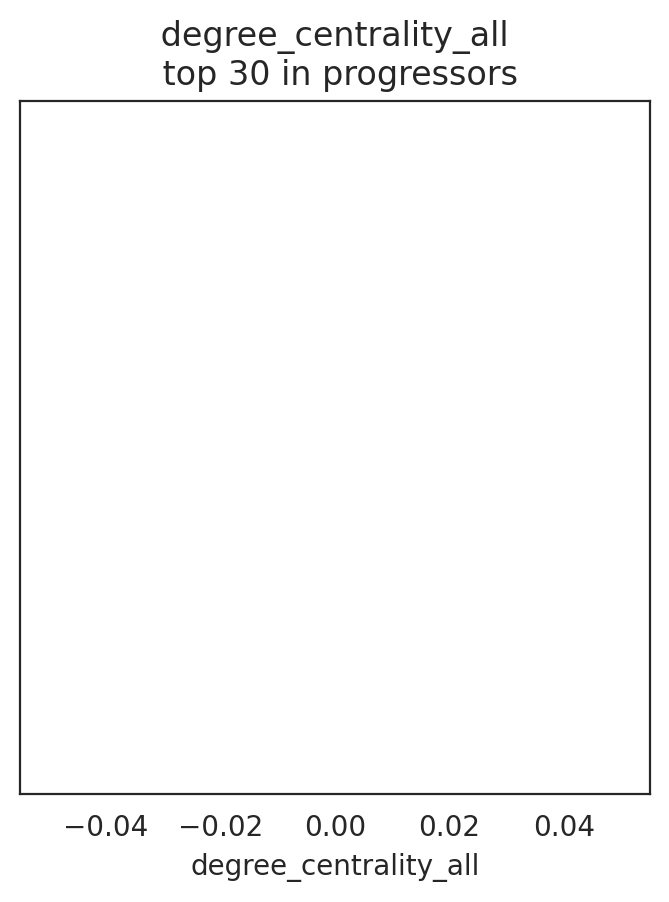

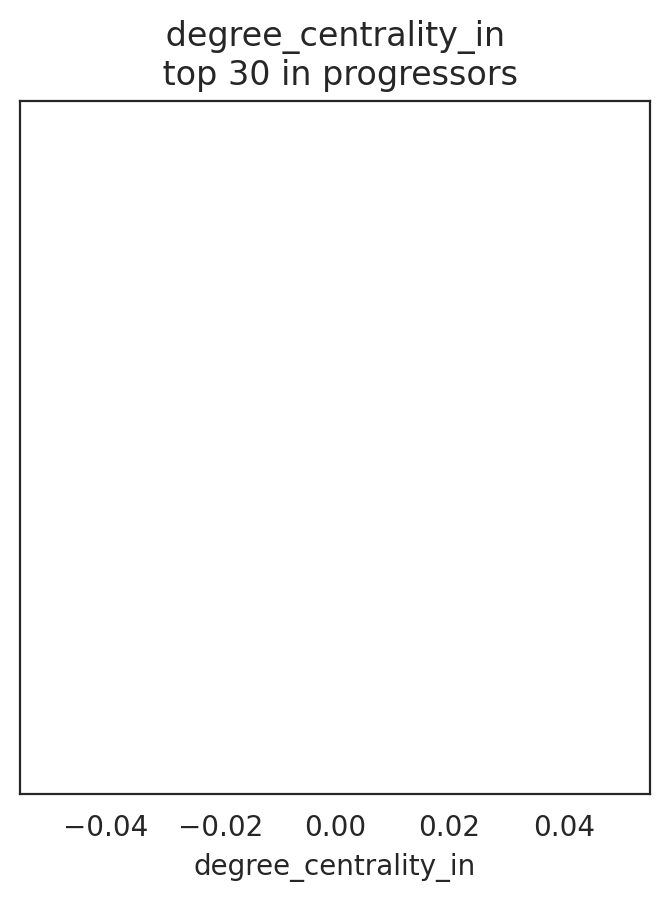

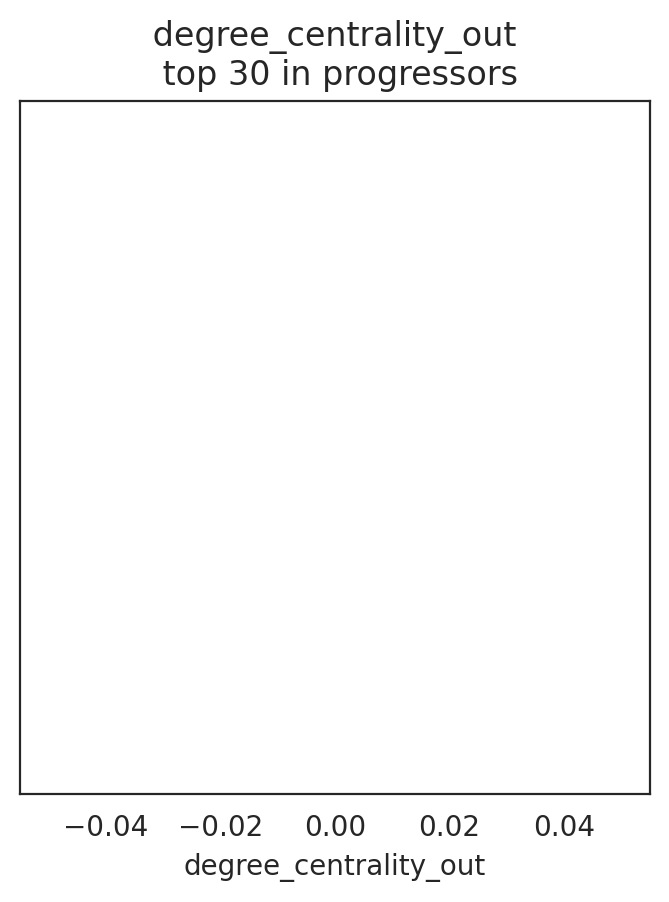

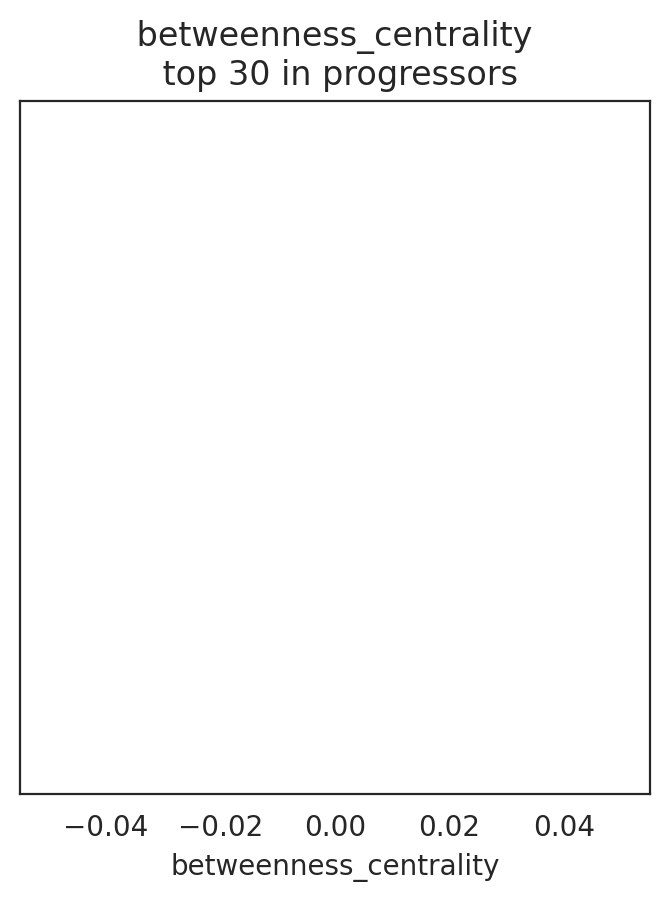

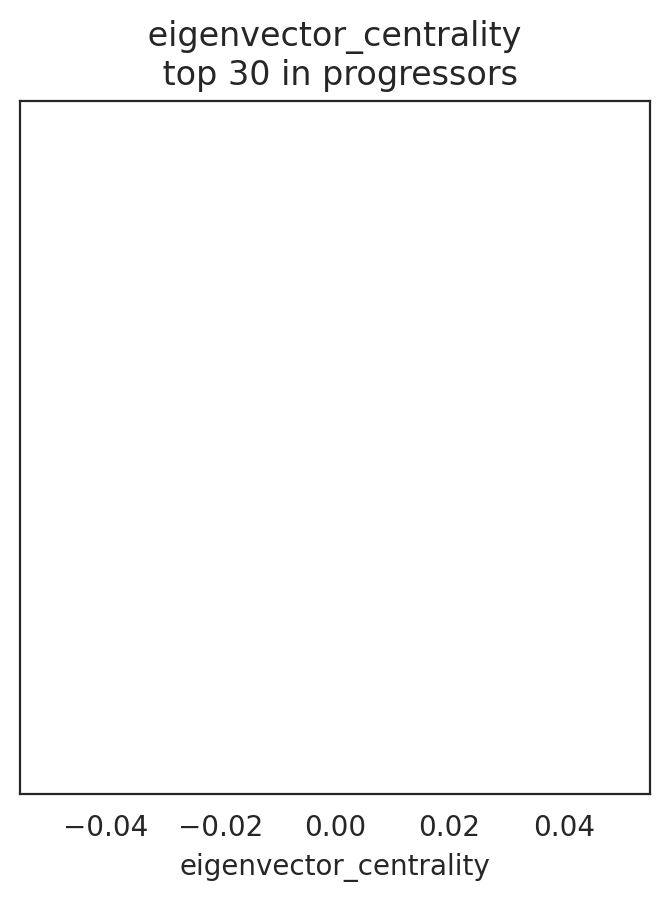

In [7]:
# Visualize top n-th genes with high scores.
links.plot_scores_as_rank(cluster="progressors", n_gene=30)



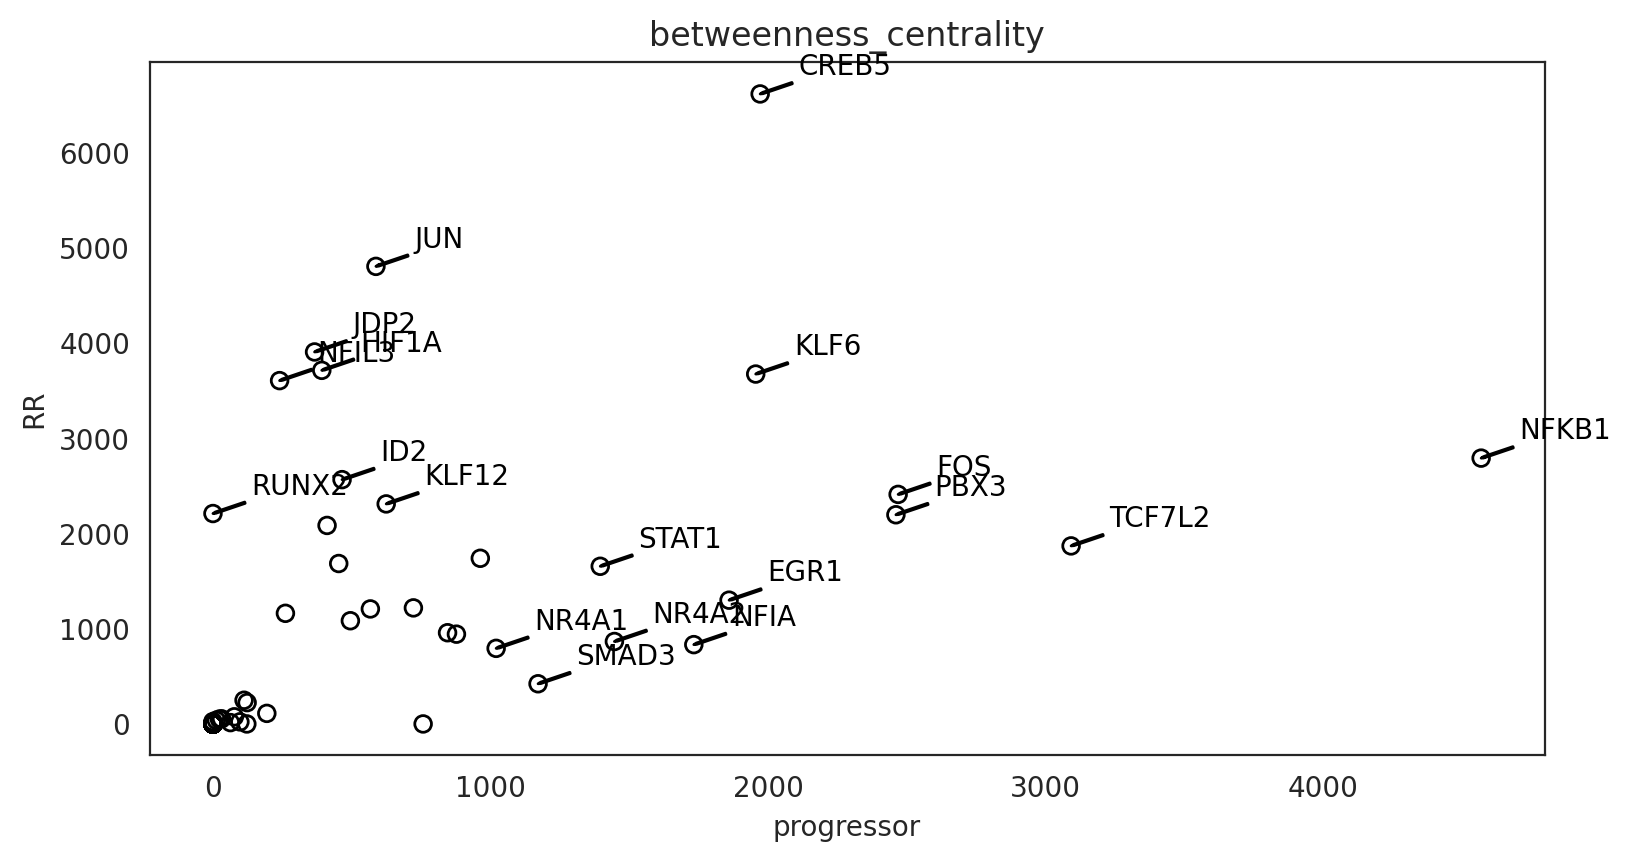

In [11]:
# Compare GRN score between two clusters
links.plot_score_comparison_2D(value="betweenness_centrality",
                               cluster1="progressor", cluster2="RR",
                               percentile=98,
                               save = "../../TF_plots/progressor_vs_RR")

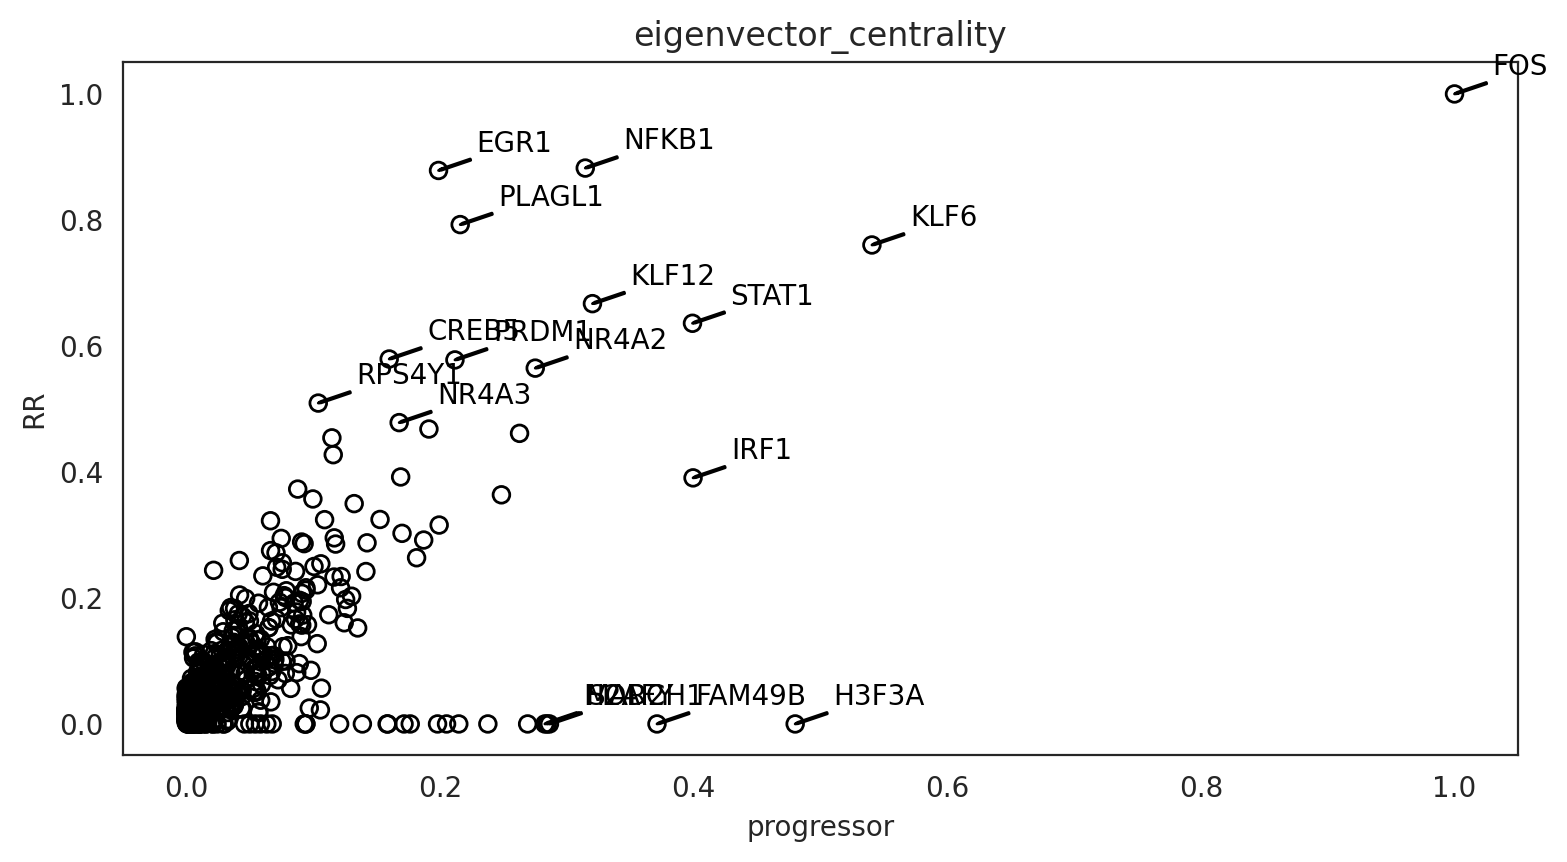

In [13]:
# Compare GRN score between two clusters
links.plot_score_comparison_2D(value="eigenvector_centrality",
                               cluster1="progressor", cluster2="RR",
                               percentile=98,
                               save = "../../TF_plots/progressor_vs_RR")

In [19]:
celltype = "Nonclassical"

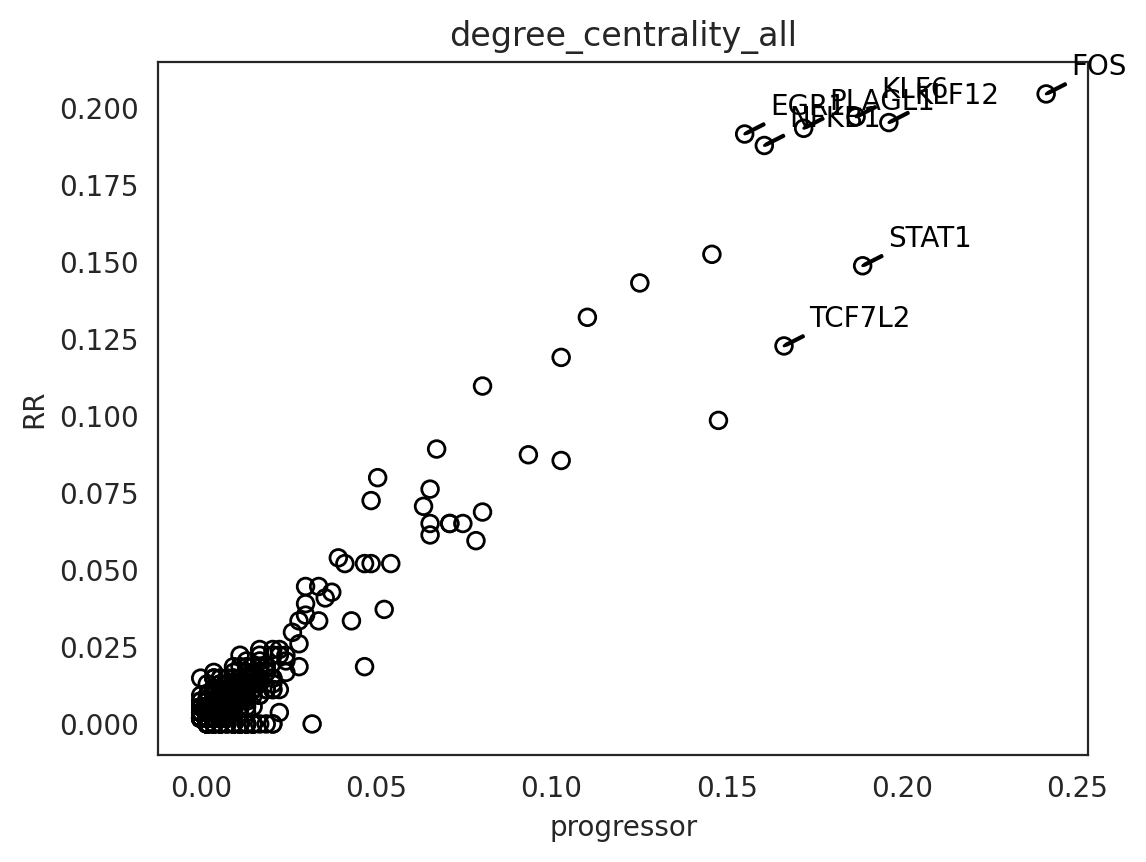

In [20]:


# Compare GRN score between two clusters
links.plot_score_comparison_2D(value="degree_centrality_all",
                               cluster1="progressor", cluster2="RR",
                               save = "../../TF_plots/progressor_vs_RR")
